# JORDI BLASCO LOZANO

In [4]:
# Importamos las librerias necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Importamos el dataset
WPCdata = pd.read_csv('dataset.csv')

# Escogemos una paleta de colores para los equipos que sera la misma en todos los plots
colores = plt.cm.tab10(range(len(WPCdata))) 

# Mostramos el dataset
WPCdata

,equipoID,nombreEq,nombreJug1,nombreJug2,sets_ganados,sets_perdidos,partidos_ganados,partidos_perdidos,enfrentamientos,puntos,puntos_por_jornada,dineroGenerado,mediaEspectadoresPorEquipo,entradasVendidasPorEquipo,pais
0,1,electroingenieros,Juan,Pedrito,11,7,4,3,"[2, 4, 3, 10, 5, 7, 6]",8,"[0, 2, 2, 4, 4, 4, 6, 8]",650,550,100,España
1,2,termonuecleares,Pedro,Adrian,11,7,4,3,"[1, 8, 10, 7, 4, 6, 9]",8,"[0, 0, 0, 2, 4, 4, 6, 8]",700,405,80,EEUU
2,3,ElPAPITO,Pablo,Elena,7,10,3,4,"[4, 9, 1, 6, 7, 5, 10]",6,"[0, 0, 2, 2, 2, 4, 4, 6]",600,900,90,China
3,4,LosPibes,Elena,Blanca,12,5,6,1,"[3, 1, 5, 8, 2, 10, 7]",12,"[0, 2, 4, 6, 6, 8, 10, 12]",1200,830,70,URS
4,5,herculanos,Carlos,Ana,9,10,3,4,"[6, 10, 4, 9, 1, 3, 8]",6,"[0, 0, 2, 2, 2, 4, 6, 6]",600,450,100,China
5,6,Palilleros,Federico,Carlos,11,7,5,2,"[5, 7, 8, 3, 9, 2, 1]",10,"[0, 2, 4, 6, 8, 10, 10, 10]",950,670,80,Nepal
6,7,MaurosTeam,Mauro,Alex,5,11,2,5,"[8, 6, 9, 2, 3, 1, 4]",4,"[0, 0, 0, 2, 2, 2, 2, 4]",500,880,90,R.D. Congo
7,8,ParricaElMejor,Parra,Teresa,7,11,3,4,"[7, 2, 6, 4, 10, 9, 5]",6,"[0, 2, 4, 4, 6, 6, 6, 6]",600,550,100,España
8,9,Ganadores,Gonzalo,Paco,8,9,3,4,"[10, 3, 7, 5, 6, 8, 2]",6,"[0, 2, 2, 2, 4, 4, 6, 6]",1150,950,120,China
9,10,UltraTeam,Sara,Luis,7,11,2,5,"[9, 5, 2, 1, 8, 4, 3]",4,"[0, 0, 0, 0, 2, 4, 4, 4]",600,800,80,Nigeria


# ESTADISTICAS PAISES

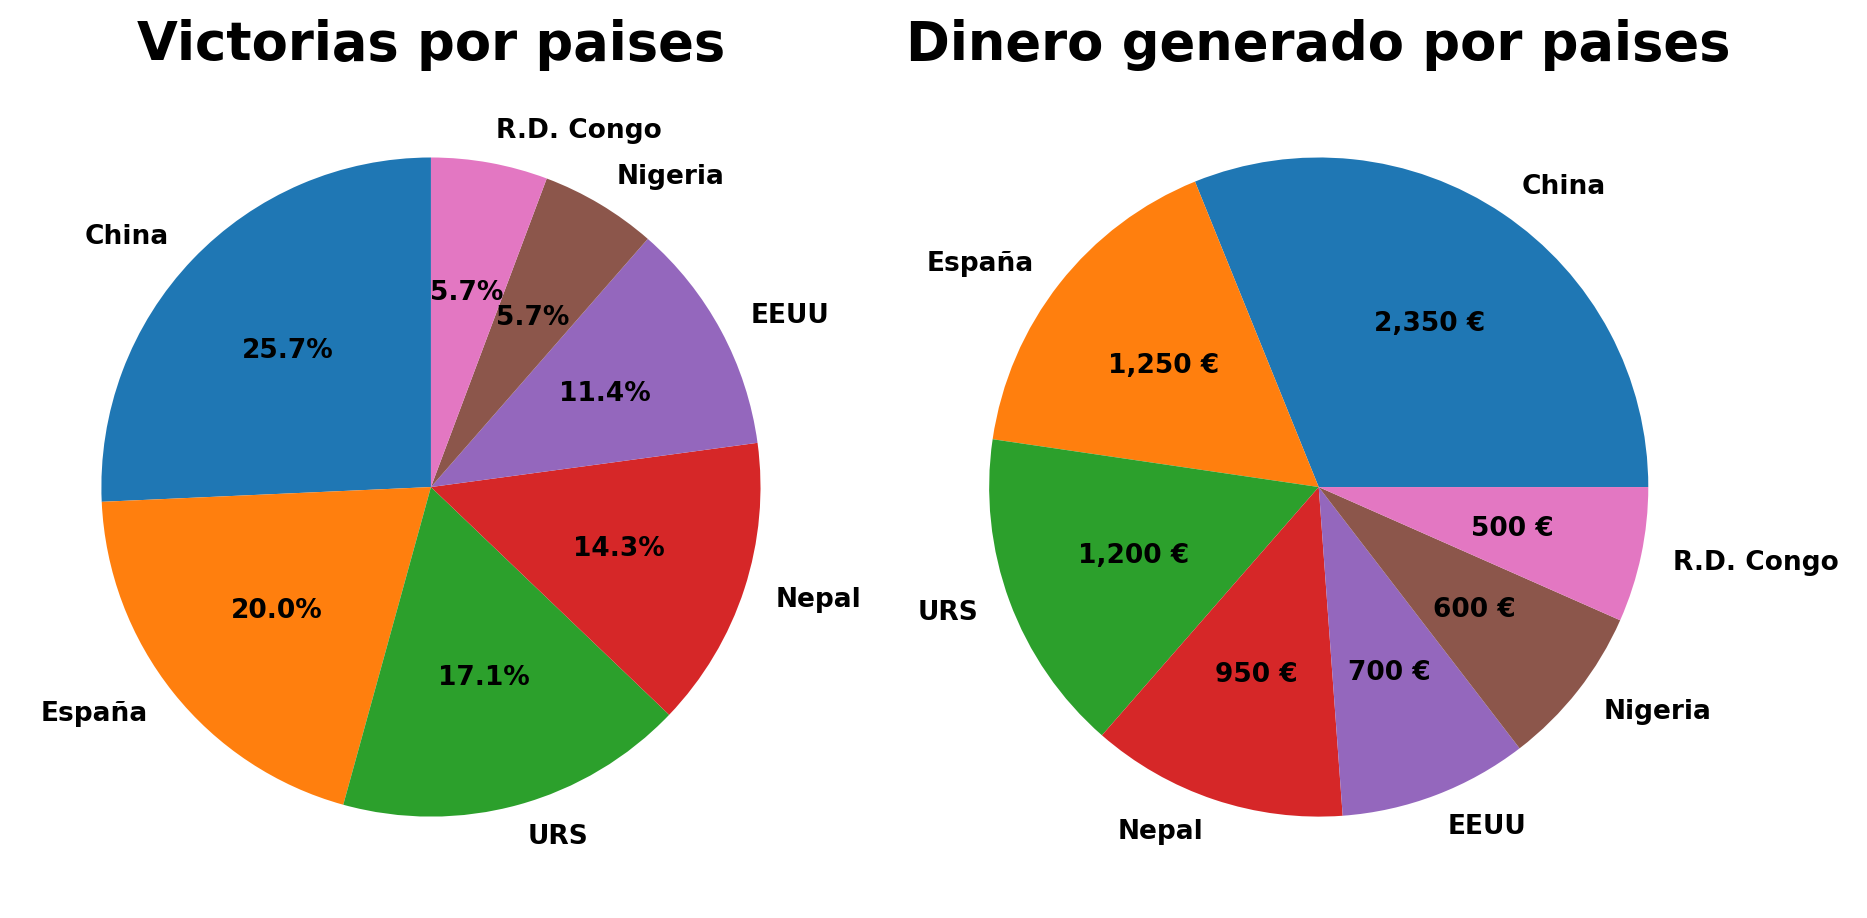

In [5]:
# guardamos los paises en una lista
paises = WPCdata['pais']

# creamos un nuevo dataframe con los paises, los partidos ganados y el dinero generado
WPCPAISES = WPCdata.groupby('pais').aggregate({'partidos_ganados': 'sum','dineroGenerado':'sum'}).sort_values('partidos_ganados', ascending=False)

# creamos una figura con dos subplots para mostrar los datos, una fila y dos columnas; tambien le damos un tamaño y una resolucion que nos guste
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 6), dpi=190)

# en cada subplot creamos un pie con los datos de partidos ganados y dinero generado, y le damos un titulo, en el primer plot dejamos los datos en porcentajes y en el segundo en dinero

pie1 = ax1.pie(WPCPAISES['partidos_ganados'], 
               labels=WPCPAISES.index, 
               startangle=90, 
               colors=colores, 
               autopct='%1.1f%%', 
               textprops={'fontsize': 10, 'weight': 'bold'})


pie2 = ax2.pie(WPCPAISES['dineroGenerado'],
               labels=WPCPAISES.index, 
               colors=colores, 
               autopct=lambda p: f'{sum(WPCPAISES["dineroGenerado"])*p/100:,.0f} €', # usamos lambda para que el texto sea numerico y no porcentual 
               textprops={'fontsize': 10, 'weight': 'bold'})


# Creamos un titulo para cada subplot
ax1.set_title('Victorias por paises', fontdict={'size':20, 'weight':'bold'})
ax2.set_title('Dinero generado por paises', fontdict={'size':20, 'weight':'bold'})

# Mostramos el grafico y ajustamos el layout para que se vea bien
plt.tight_layout() 
plt.show()

# TABLA DE EXITOS

In [6]:

# Calcular el tamaño de los puntos según el dinero generado, ademas de multiplicar por 1.8 para que se vean con una mayor diferencia

tamaño_puntos = WPCdata['dineroGenerado']*1.8 / WPCdata['dineroGenerado'].max() * 1000

# Creamos una figura con un tamaño y resolucion que nos guste
plt.figure(figsize=(10, 6),dpi=190)

# Inicializamos una lista vacia para la leyenda
leyenda = []

# Ajustamos en que se va a basar el exito mediatico de cada equipo, en este caso en las entradas vendidas multiplicado por 2 mas la media de espectadores 
exito_mediatico = list(WPCdata['entradasVendidasPorEquipo'])
for i in range(len(exito_mediatico)):
    exito_mediatico[i] *= 2 + WPCdata['mediaEspectadoresPorEquipo'][i]

# Creamos un scatter plot con los datos de exito mediatico y puntos, ademas de usar diferentes tamaños que significaran el dinero generado por cada equipo y usamos la paleta de colores que creamos al principio para que cada equipo tenga un color diferente. Ajustamos tambien los parametros que nos gusten y añadimos a la leyenda personalizada un punto de tamaño uniforme para todos los equipos del color del mismo
for i in range(len(WPCdata)):
    plt.scatter(exito_mediatico[i], 
                WPCdata['puntos'][i], 
                s=tamaño_puntos[i], 
                color=colores[i], 
                alpha=0.7)
    
    leyenda.append(plt.Line2D([0], 
                              [0], 
                              marker='o', 
                              color='w', 
                              markersize=10, 
                              markerfacecolor=colores[i], 
                              label=WPCdata['nombreEq'][i]))
    
    plt.text(exito_mediatico[i]+0.06, 
             WPCdata['puntos'][i]-0.05,
             f'{WPCdata['dineroGenerado'][i]} €', 
             fontsize=8, 
             fontweight='bold', 
             ha='center', 
             va='center')

# Añadimos a la leyenda un ultimo punto para indicar el dinero generado
leyenda.append(plt.Line2D([0], 
                          [0], 
                          marker='o', 
                          color='w', 
                          markersize=10, 
                          markerfacecolor='black', 
                          label='Dinero generado'))
# Añadimos la leyenda personalizada al grafico
plt.legend(handles=leyenda, 
           loc='upper left', 
           bbox_to_anchor=(1, 1), 
           title='Equipos', 
           title_fontsize='13', 
           fontsize='11', 
           shadow=True)


# Añadimos etiquetas y títulos
plt.title('Tabla de exitos World Padel Cup', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Exito mediatico (Espectadores totales)', fontdict={'size':13, 'weight':'bold'})
plt.ylabel('Puntos', fontdict={'size':13, 'weight':'bold'})

# Añadimos limites y ajustamos el layout para que se vea bien
plt.ylim(1,14)
plt.xlim(20000,130000)
plt.tight_layout()

# Mostramos el grafico
plt.show()


SyntaxError: f-string: unmatched '[' (2692659805.py, line 34)

# PROGRESION DE PUNTOS POR EQUIPOS

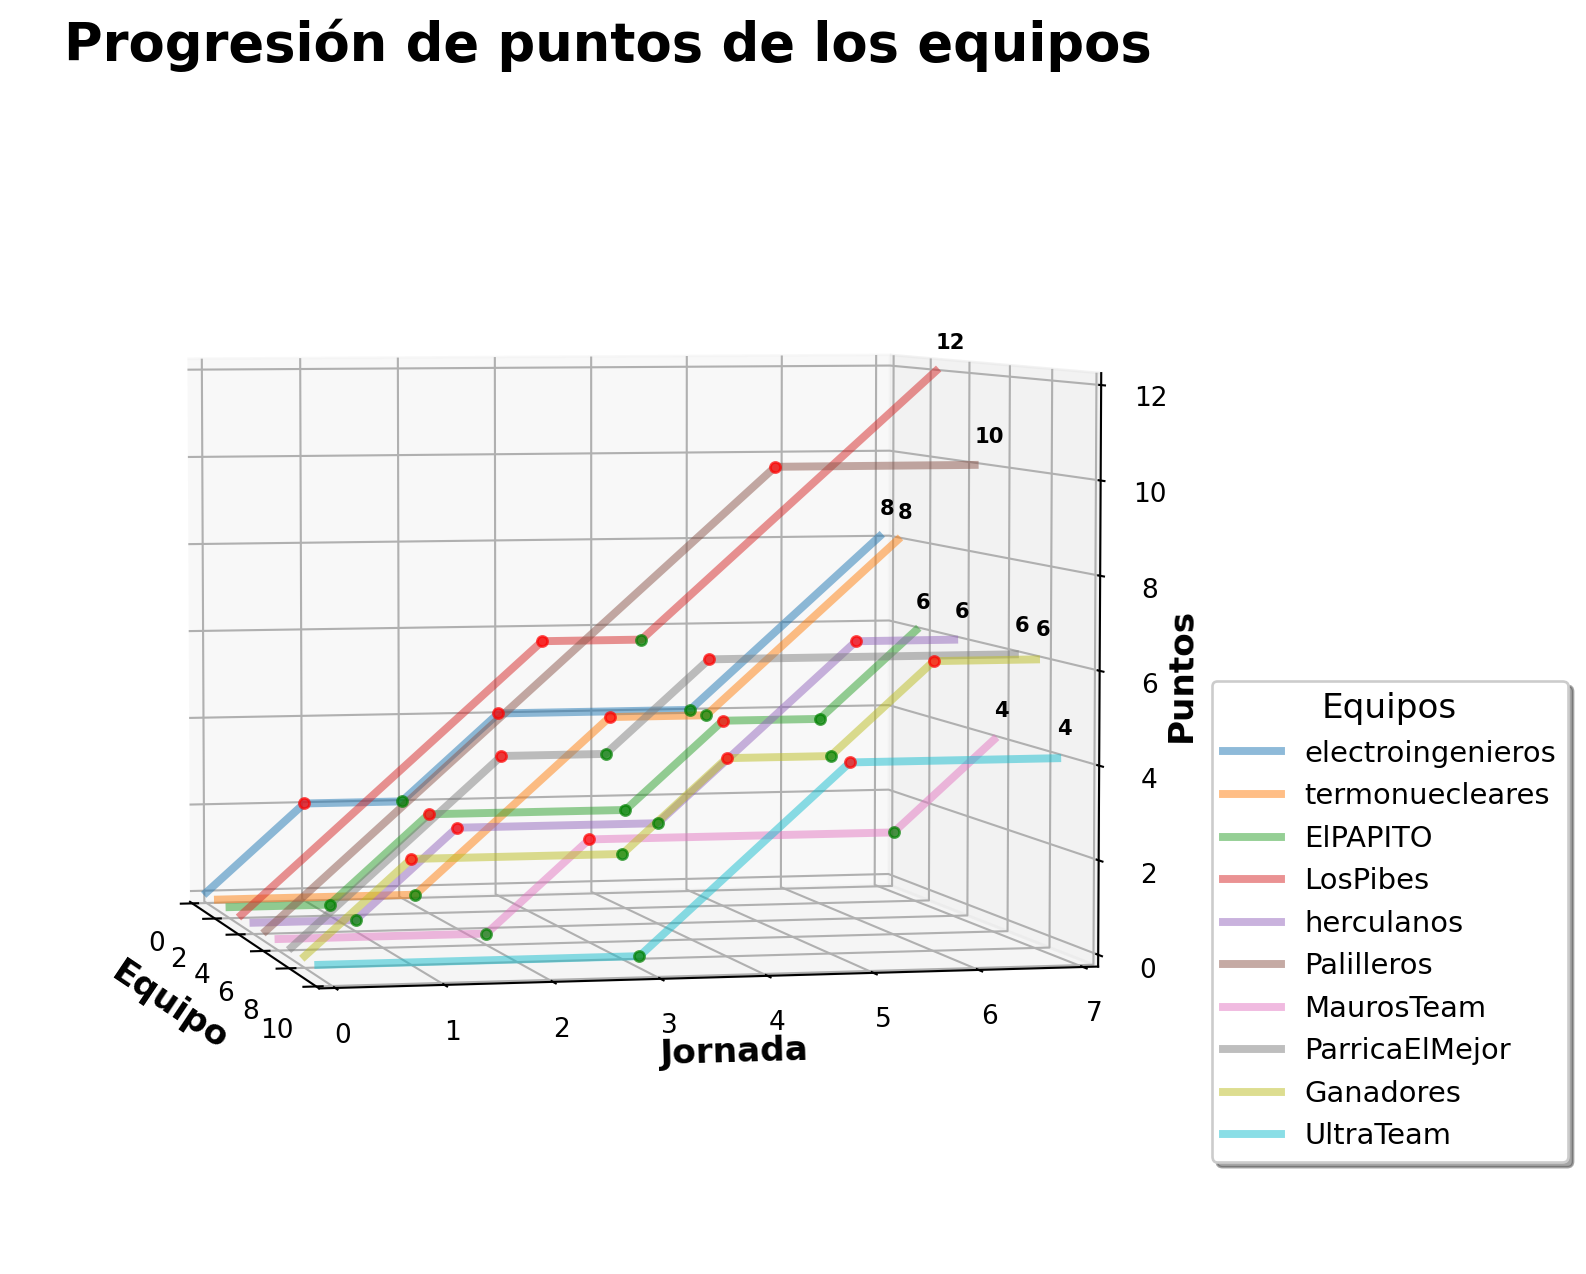

In [14]:

# Usamos .apply(eval) y .tolist() para convertir la lista de listas de strings a una lista de listas de enteros y luego la guardamos en un array de numpy
progresiones_equipos = np.array(WPCdata['puntos_por_jornada'].apply(eval).tolist())

# Creamos una lista de jornadas que sera el eje y
jornadas = range(0, len(progresiones_equipos[0]) )

# Contamos el numero de equipos y los guardamos en una variable
num_equipos = len(progresiones_equipos)

# Creamos una figura con un tamaño y resolucion que nos guste
fig= plt.figure(figsize=(8, 12), dpi=190)
# Añadimos un subplot 3D a la figura
ax = fig.add_subplot(111, projection='3d')

# Creamos un bucle que recorra cada equipo y cree una linea 3D con los puntos de cada jornada, ademas de añadir un scatter plot en los puntos donde se produzca un cambio de tendencia entre jornadas de un equipo, al final añadimos un texto con el numero de puntos en la jornada 7, que es la ultima
for equipo, puntos in enumerate(progresiones_equipos):
    ax.plot( [equipo] * len(jornadas),  
             jornadas,
             puntos, 
             color=colores[equipo], 
             linewidth=3, 
             alpha=0.5, 
             label=WPCdata['nombreEq'][equipo])
    
    for jornada in range(1, len(jornadas) - 1):
        if puntos[jornada + 1] == puntos[jornada] and puntos[jornada] == puntos[jornada - 1] + 2:
            ax.scatter(equipo, 
                       jornadas[jornada], 
                       puntos[jornada], 
                       color='red', 
                       s=15, 
                       alpha=0.7)

        elif puntos[jornada - 1] == puntos[jornada] and puntos[jornada] == puntos[jornada + 1] - 2:
            ax.scatter(equipo, 
                       jornadas[jornada], 
                       puntos[jornada], 
                       color='green', 
                       s=15, 
                       alpha=0.7)

    ax.text(equipo,
            7,
            puntos[7] +0.5, 
            puntos[7], 
            color='black', 
            fontsize=8, 
            fontdict={'weight':'bold'})


# Etiquetamos los ejes y añadimos un titulo
ax.set_xlabel('Equipo', fontdict={'size':13, 'weight':'bold'})
ax.set_ylabel('Jornada', fontdict={'size':13, 'weight':'bold'})
ax.set_zlabel('Puntos', fontdict={'size':13, 'weight':'bold'}, labelpad=-2)
ax.set_title('Progresión de puntos de los equipos', fontdict={'size':20, 'weight':'bold'})

# Ajustamos la vista del grafico (pd: he intentado encontrar la mejor elevacion y rotacion (provando muchas) para que se viesen bien tanto los puntos como las lineas y jornadas sin que cambie mucho la percepcion de los datos)
ax.view_init(elev=4, azim=-13)

# Añadimos la leyenda al grafico, esta vez no necesitaba que fuera personalizada
plt.legend(loc='upper left', 
           bbox_to_anchor=(1, 0.5), 
           title='Equipos', 
           title_fontsize='13', 
           fontsize='11', 
           shadow=True, 
           ncol=1)

# Añadimos los limites 
ax.set_xlim(0, 10)
ax.set_ylim(0, 7)
ax.set_zlim(0, 12)

# Mostramos el grafico
plt.show()



# SETS GANADOS Y PERDIDOS POR EQUIPO

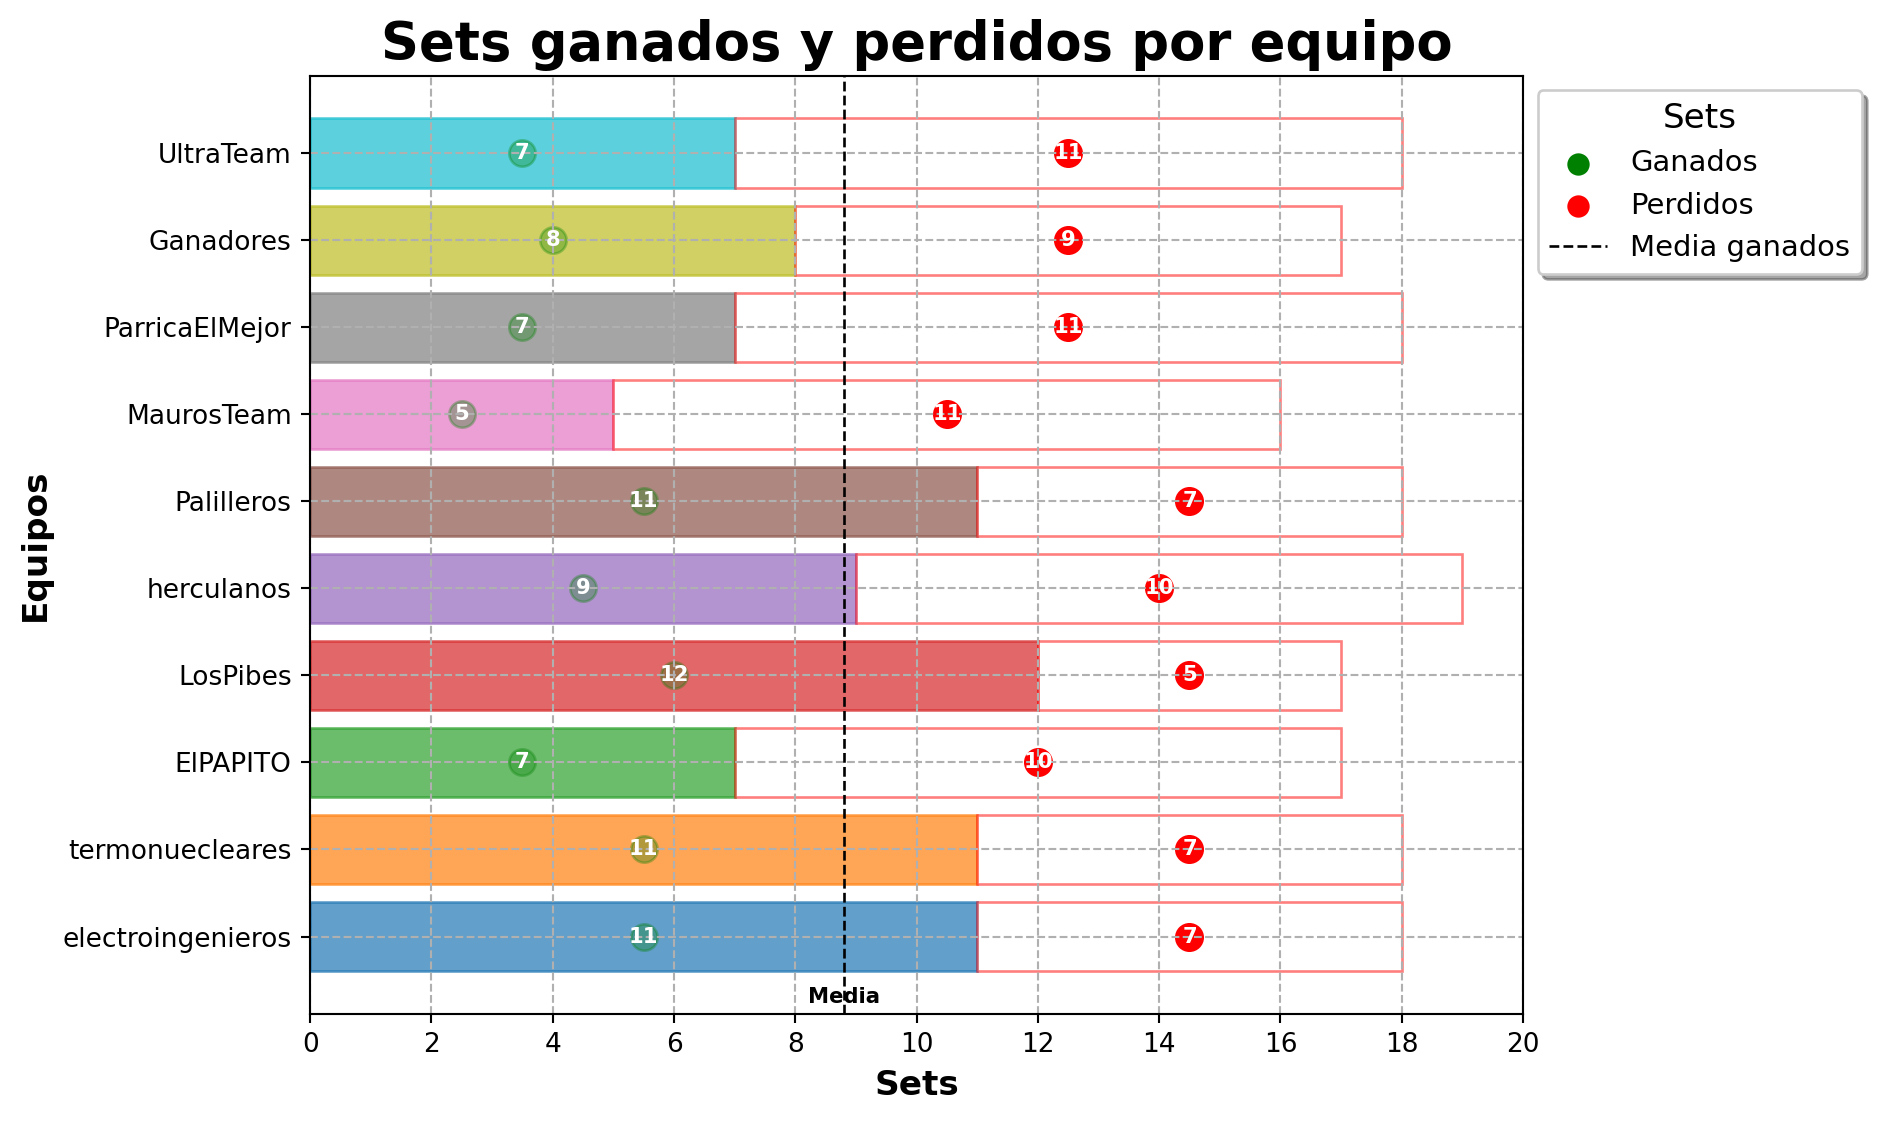

In [15]:

# Calculamos la media de sets ganados por equipo
media_sets_ganados = WPCdata['sets_ganados'].mean()

# Añadimos una leyenda personalizada con un scatter plot para los equipos ganados y otro para los equipos perdidos, ademas de una linea para la media de sets ganados
leyenda = [ax.scatter([0], [0], color='green', lw=4, label='Ganados'),
           ax.scatter([0], [0], color='red', lw=4, label='Perdidos'),
           (plt.Line2D([0], [0], color='black', lw=1, linestyle='--', label='Media ganados'))]

# Creamos una figura con un tamaño y resolucion que nos guste
fig, ax = plt.subplots(figsize=(10, 6), dpi=190)

# Creamos un bar plot horizontal con los sets ganados y perdidos por equipo, añadimos la barra de sets perdidos a la derecha de la de sets ganados
bar1 = ax.barh (WPCdata['nombreEq'], 
                WPCdata['sets_ganados'], 
                color=colores, 
                alpha=0.7, 
                edgecolor=colores, 
                height=0.8)

bar2 = ax.barh (WPCdata['nombreEq'],
                WPCdata['sets_perdidos'], 
                left=WPCdata['sets_ganados'], 
                color='white',
                alpha=0.5, 
                edgecolor='red', 
                height=0.8)

# Añadimos etiquetas a las barras y un scatter plot para los puntos de sets ganados y perdidos para que se vean claramente los sets ganados y perdidos

for i in range(len(WPCdata['nombreEq'])):
    ax.text(WPCdata['sets_ganados'][i] + WPCdata['sets_perdidos'][i]/2 , 
            i, 
            WPCdata['sets_perdidos'][i], 
            ha='center', 
            va='center', 
            color='white', 
            fontsize=8, 
            fontweight='bold')
    
    ax.scatter(WPCdata['sets_ganados'][i] + WPCdata['sets_perdidos'][i]/2, 
               i, 
               color='red', 
               s=100, 
               alpha=1)
    
    ax.text(WPCdata['sets_ganados'][i]/2, 
            i, 
            WPCdata['sets_ganados'][i], 
            ha='center', 
            va='center', 
            color='white', 
            fontsize=8, 
            fontweight='bold')
    
    ax.scatter(WPCdata['sets_ganados'][i]/2, 
               i, 
               color='green', 
               s=100, 
               alpha=0.3)
    

# Añadimos una linea para la media de sets ganados y un texto con el nombre de 'media'
ax.axvline(media_sets_ganados, color='black', linewidth=1, linestyle='--')
ax.text(media_sets_ganados, -0.7, 'Media', ha='center', va='center', color='black', fontsize=8, fontweight='bold')

# Añadimos etiquetas y titulos
plt.title('Sets ganados y perdidos por equipo', fontdict={'size':20, 'weight':'bold'})
plt.xlabel('Sets', fontdict={'size':13, 'weight':'bold'})
plt.ylabel('Equipos', fontdict={'size':13, 'weight':'bold'})

# Añadimos la leyenda personalizada al grafico y ajustamos el layout para que se vea bien
plt.legend(handles=leyenda, loc='upper left', bbox_to_anchor=(1, 1) , title='Sets', title_fontsize='13', fontsize='11', shadow=True)
plt.tight_layout()

# Forzamos que los ticks del eje x vayan de 2 en 2 y añadimos un grid con lineas discontinuas
plt.xticks(range(0, 21, 2))
plt.grid(axis='both', linestyle='--', alpha=1)

# Mostramos el grafico
plt.show()

